<h2>Trabalho 02 - Privacidade diferencial</h2>
<p>
    <strong>Professor:</strong> Javam Machado<br>
    <strong>Disciplina:</strong> Privacidade de Dados<br>
    <strong>Aluno:</strong> Fco Alessandro Feitoza da Silva - 543032
</p>
<hr>

In [ ]:
import matplotlib.pyplot as matplot

import numpy as np
import pandas as pd

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# lendo o arquivo csv
dataset = pd.read_csv('covid.csv', sep=';').drop(['Unnamed: 0'], axis=1)

# exibindo alguns dados do dataset
dataset.head()

Total de registros: 879543


,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo


<h3>1.1 Mecanismo de Laplace</h3>

Calcule a idade dos indivı́duos representados em cada registro a partir da data de nascimento. Considere apenas datas de nascimento referentes aos séculos XX e XXI.

As consultas deverão usar os seguintes valores de budget: ε = 0.1, ε = 0.5, ε = 1.0 e ε = 10.

In [73]:
list_epsilon = [0.1, 0.5, 1.0, 10]
sensibility = 1

<h4>Q1: Média da idade dos indivı́duos representados no dataset</h4>

In [74]:
# casting de data de nascimento pro tipo DateTime
dataset['Nascimento'] = pd.to_datetime(dados['Nascimento'], format='%Y-%m-%d', errors='coerce')

# Isolando os nascimento entre 1900 e 20xx
datasDeNascimento = dataset.loc[dataset['Nascimento'].dt.year > 1901]

# Calculando a idade aproximada (estou levando em consideração apenas o ano, pra uma idade mais assertiva deveria usar o mes e dia tbm)
datasDeNascimento['Idade'] = (datetime.now().year - datasDeNascimento['Nascimento'].dt.year)
datasDeNascimento.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame,Idade
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo,19
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo,39
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo,40
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo,30
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo,52


In [87]:
mediaNascimento = datasDeNascimento['Idade'].mean()
print("Resultado/mean:", mediaNascimento)

# funcao para mostrar os dados, irei usar nos proximos "for"

def showMessage(x, y):
    print('-------------------------------------------')
    print("Laplace, e =", x,":", round(y, 2))
    print('-------------------------------------------')

list_F_x = []
for epsilon in list_epsilon:
    F_x = mediaNascimento + np.random.laplace(loc=0, scale=sensibility/epsilon)
    list_F_x.append(round(F_x, 2))
    showMessage(epsilon, F_x)

Resultado real: 41.68716116649687
Resultado Laplace, e = 0.1 : 35.53
Resultado Laplace, e = 0.5 : 40.01
Resultado Laplace, e = 1.0 : 41.3
Resultado Laplace, e = 10 : 41.6


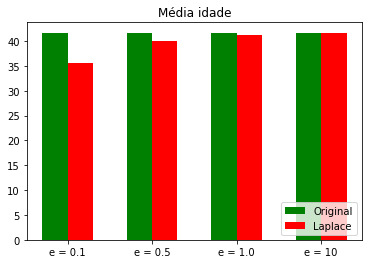

In [88]:
# Plotagem do gráfico
labels = [f'e = {epsilon}' for epsilon in list_epsilon]
media = [round(mediaNascimento, 1) for i in range(4)]

x = np.arange(len(labels))
width = 0.3
fig, ax = matplot.subplots()
plot1 = ax.bar(x-width/2, media, width, label='Original', color='#3300ff')
plot2 = ax.bar(x+width/2, list_F_x, width, label='Laplace', color='#AABBCC')

ax.set_xticks(x, labels)
ax.legend(loc=4)
matplot.title("Média idade")
matplot.show()

<h4>Q2: Número de exames positivos (atributo <i>resultadoFinalExame</i>)</h4>

In [108]:
g_x = len(datasDeNascimento.loc[dataset['ResultadoExame'] == 'Positivo'])
print("Resultado:", g_x)

list_G_x = []
for epsilon in list_epsilon:
    G_x = g_x + np.random.laplace(loc=0, scale=sensibility/epsilon)
    list_G_x.append(round(G_x))
    showMessage(epsilon, G_x)

Resultado real: 265914
Resultado Laplace, e = 0.1 : 265910
Resultado Laplace, e = 0.5 : 265916
Resultado Laplace, e = 1.0 : 265915
Resultado Laplace, e = 10 : 265914


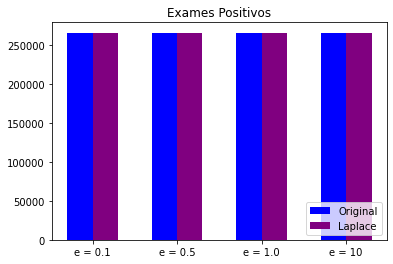

In [113]:
# Gerando o grafico
labels = [f'e = {epsilon}' for epsilon in list_epsilon]
consulta = [round(g_x) for i in range(4)]

x = np.arange(len(labels))
width = 0.3
fig, ax = matplot.subplots()
plot1 = ax.bar(x-width/2, consulta, width, label='Original', color='gray')
plot2 = ax.bar(x+width/2, list_G_x, width, label='Laplace', color='magenta')

ax.set_xticks(x, labels)
ax.legend(loc=4)
matplot.title("Exames Positivos")
matplot.show()

<h4>Q3: Total de exames realizados por municı́pio (atributo <i>municipio-caso</i>)</h4>

In [117]:
datasetMeso = pd.read_csv('dadoscovid.csv', sep=',')
datasetMeso.head()

,identificador,genero,nascimento,idade,resultadoExame,municipio,codigoMunicipio,mesoregiao
0,86343365d3538dad3d93736b78c986ab,MASCULINO,1978-04-20,44,Negativo,ABAIARA,230010,Sul Cearense
1,a1c274cc7c0bc943e2806148274f196d,MASCULINO,1990-05-20,32,Negativo,ABAIARA,230010,Sul Cearense
2,7c08d488bb6562bdc29861ede553e6b0,MASCULINO,1997-12-20,24,Positivo,ABAIARA,230010,Sul Cearense
3,6ce4fe9d51af40f15d20dc37491ee742,FEMININO,1995-02-20,27,Positivo,ABAIARA,230010,Sul Cearense
4,9276dfcc14fbe679a6ecc093d8e00b71,MASCULINO,1991-07-20,31,Positivo,ABAIARA,230010,Sul Cearense


In [120]:
h_x = datasetMeso.groupby('mesoregiao')['resultadoExame'].count()
print("Resultado:", h_x)

Resultado real: mesoregiao
Centro-Sul Cearense            1871
Jaguaribe                      2099
Metropolitana de Fortaleza    10626
Noroeste Cearense              6054
Norte Cearense                 2922
Sertões Cearenses              3337
Sul Cearense                   4484
Name: resultadoExame, dtype: int64


In [128]:
mesos = {}
for meso, num_exames in zip(h_x.index, h_x.values):
    print("Região: ", meso)
    
    list_H_x = []
    for epsilon in list_epsilon:
        H_x = num_exames + np.random.laplace(loc=0, scale=sensibility/epsilon)
        list_H_x.append(round(H_x))
        showMessage(epsilon, H_x)
    mesos.update({meso: list_H_x})

--> Centro-Sul Cearense
    - resultado Laplace, e = 0.1 : 1841
    - resultado Laplace, e = 0.5 : 1871
    - resultado Laplace, e = 1.0 : 1870
    - resultado Laplace, e = 10 : 1871
--> Jaguaribe
    - resultado Laplace, e = 0.1 : 2096
    - resultado Laplace, e = 0.5 : 2099
    - resultado Laplace, e = 1.0 : 2095
    - resultado Laplace, e = 10 : 2099
--> Metropolitana de Fortaleza
    - resultado Laplace, e = 0.1 : 10629
    - resultado Laplace, e = 0.5 : 10633
    - resultado Laplace, e = 1.0 : 10627
    - resultado Laplace, e = 10 : 10626
--> Noroeste Cearense
    - resultado Laplace, e = 0.1 : 6044
    - resultado Laplace, e = 0.5 : 6059
    - resultado Laplace, e = 1.0 : 6054
    - resultado Laplace, e = 10 : 6054
--> Norte Cearense
    - resultado Laplace, e = 0.1 : 2928
    - resultado Laplace, e = 0.5 : 2920
    - resultado Laplace, e = 1.0 : 2922
    - resultado Laplace, e = 10 : 2922
--> Sertões Cearenses
    - resultado Laplace, e = 0.1 : 3346
    - resultado Laplace, e = 

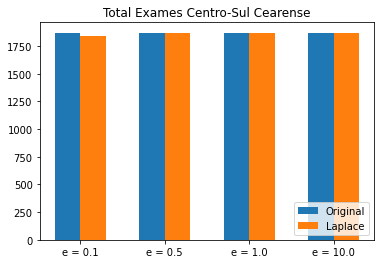

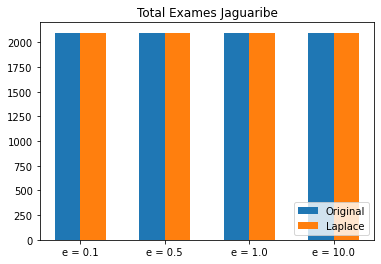

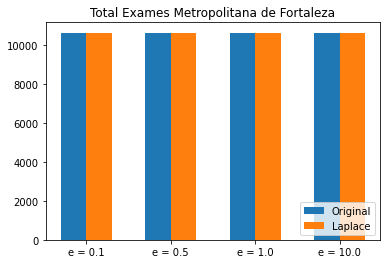

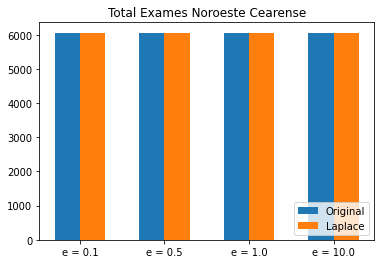

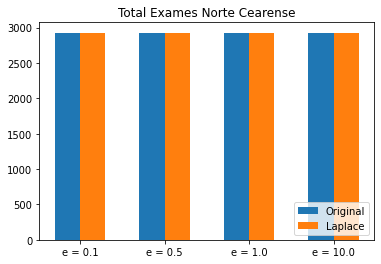

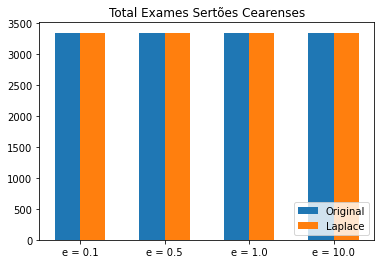

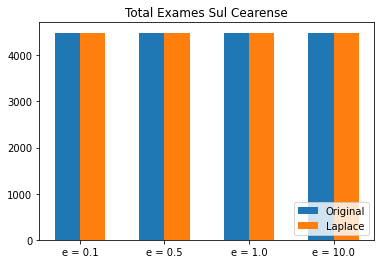

In [178]:
for meso in mesos:    
    labels = [f'e = {epsilon}' for epsilon in list_epsilon]
    consulta = [h_x[meso] for i in range(4)]

    x = np.arange(len(labels))
    width = 0.3
    fig, ax = matplot.subplots()
    plot1 = ax.bar(x-width/2, consulta, width, label='Original', color='red')
    plot2 = ax.bar(x+width/2, mesos[meso], width, label='Laplace', color='green')

    ax.set_xticks(x, labels)
    ax.legend(loc=4)
    matplot.title(f'Total Exames {meso}')
    matplot.show()

<h3>1.2 Mecanismo Exponencial</h3>

In [180]:
def score(atributo, opcao):
    a = atributo.value_counts()[opcao];
    b = atributo.shape[0]
    return a/b

def exponencial(df, R, score, sensibilidade, epsilon):
    scores = [score(df, opcao) for opcao in R]
    
    probabilidades = [np.exp(epsilon * score / (2 * sensibilidade)) for score in scores]
    
    probabilidades = probabilidades / np.linalg.norm(probabilidades, ord=1)

    return np.random.choice(R, 1, p=probabilidades)[0]

<h4>Q1: Qual o municı́pio (atributo municipioCaso) com o menor número de casos positivos (atributo  <i>resultadoFinalExame</i>) de COVID-19</h4>

In [181]:
dadosMunicipio = datasDeNascimento.loc[dataset['ResultadoExame'] == 'Positivo']

In [182]:
municipios = dadosMunicipio['Municipio'].unique()
sensibility = 1
list_epsilon = [0.1, 0.5, 1.0, 10.0]

In [183]:
results = dict()
for epsilon in list_epsilon:
    reps = []
    for i in range(10):
        rep = exponencial(dadosMunicipio['Municipio'], municipios, score, sensibility, epsilon)
        reps.append(rep)
        
    results.setdefault(f'e = {epsilon}', reps)

In [184]:
dados3 = pd.DataFrame(results)

In [186]:
Counter(dados3['e = 0.1'])

Counter({'JARDIM': 1,
         'GUAIÚBA': 1,
         'NOVA RUSSAS': 1,
         'TARRAFAS': 1,
         'MILHA': 1,
         'MARANGUAPE': 1,
         'QUIXERE': 1,
         'BAIXIO': 1,
         'APUIARES': 1,
         'BOA VIAGEM': 1})

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

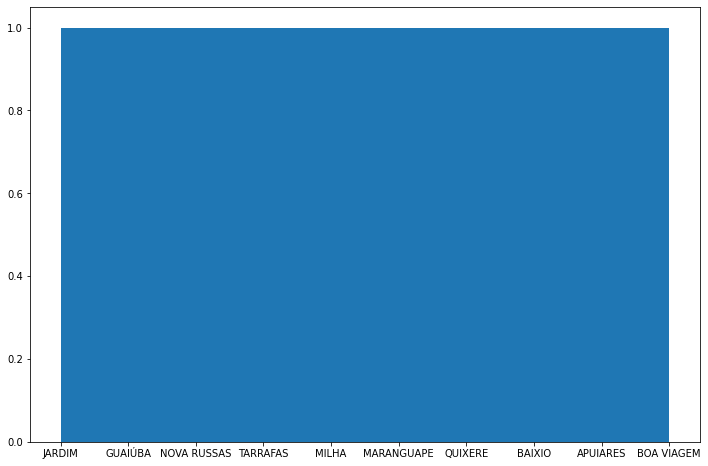

In [189]:
matplot.figure(figsize=(12, 8))
matplot.hist(Counter(dados3['e = 0.1']))